In [25]:
log_file_path = "./logs.log"
with open(log_file_path, 'r') as file:
    log_content = file.read()
logs = log_content.split('\n\n')
log_dict = {}

for log in logs:
    if log:
        lines = log.split('\n')
        model_name = lines[0]
        log_entries = lines[1:]
        log_dict[model_name] = log_entries

processed_log_dict = {}
for model, entries in log_dict.items():
    processed_entries = []
    for entry in entries:
        data = entry.split(', ')
        accuracy = None
        replaced = None
        for datum in data:
            if 'accuracy' in datum:
                accuracy = datum.split(': ')[1]
            if 'replaced' in datum:
                replaced = datum.split(': ')[1]
        # Adding the extracted values to the processed entries
        if accuracy and replaced:
            processed_entries.append({'accuracy': accuracy, 'replaced': replaced})
    processed_log_dict[model] = processed_entries

data= {}
for m in processed_log_dict.keys():
	print(m)
	x,y = [],[]
	for l in processed_log_dict[m]:
		y.append(100*float(l['accuracy']))
		x.append(float(l['replaced']))
	data[m] = {'y':y, 'x':x}


In [ ]:
import matplotlib.pyplot as plt

def pplot(x1,y1,x2,y2, name):
	plt.figure(figsize=(6,4))
	plt.plot(x1, y1, marker='o', color='salmon', label='$K$=$50$, $b$=$4$')
	plt.plot(x2, y2, marker='o', color='skyblue', label='$K$=$128$, $b$=$2$')
	plt.xlabel('Blocks Replaced by Cluster Centers', fontsize='large', fontweight='bold')
	plt.ylabel('Accuracy (%)', fontsize='large', fontweight='bold')
	plt.ylim(0, 100)
	plt.tight_layout()
	plt.legend()
	plt.savefig(f'./{name}.png', dpi=300)

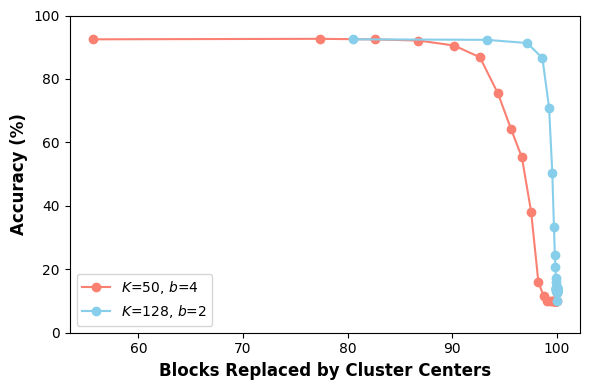

In [54]:


x1 = data['resnet_cifar_k50_b4']['x']
y1 = data['resnet_cifar_k50_b4']['y']
x2 = data['resnet_cifar_k128_b2']['x']
y2 = data['resnet_cifar_k128_b2']['y']
pplot(x1,y1,x2,y2, name='resnet_cifar')

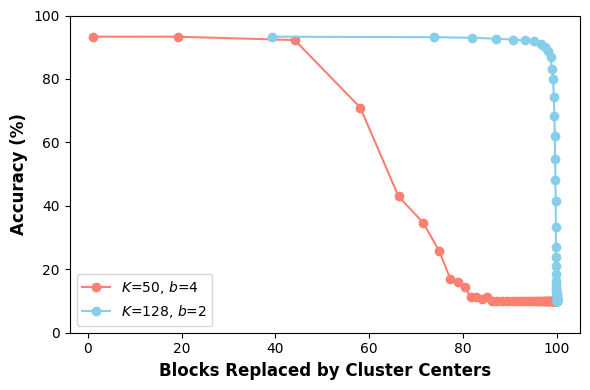

In [55]:
x1 = data['resnet_imagenet_k50_b4']['x']
y1 = data['resnet_imagenet_k50_b4']['y']
x2 = data['resnet_imagenet_k128_b2']['x']
y2 = data['resnet_imagenet_k128_b2']['y']
pplot(x1,y1,x2,y2, name='resnet_imagenet')

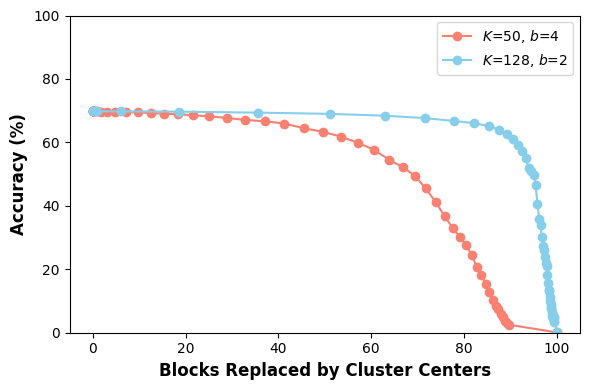

In [56]:
x1 = data['vgg_cifar_k50_b4']['x']
y1 = data['vgg_cifar_k50_b4']['y']
x2 = data['vgg_cifar_k128_b2']['x']
y2 = data['vgg_cifar_k128_b2']['y']
pplot(x1,y1,x2,y2, name='vgg_cifar')

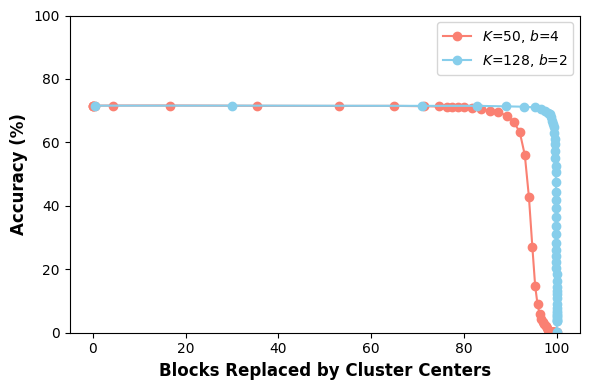

In [57]:
x1 = data['vgg_imagenet_k50_b4']['x']
y1 = data['vgg_imagenet_k50_b4']['y']
x2 = data['vgg_imagenet_k128_b2']['x']
y2 = data['vgg_imagenet_k128_b2']['y']
pplot(x1,y1,x2,y2, name='vgg_imagenet')